In [1]:
import copy
import matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib.pyplot import imshow
from numpy.random import randn
from scipy import stats
import pandas as pd
import time
from scipy.stats import multivariate_t
import random

In [3]:
iter = 1000
box3 = np.zeros((6,10,iter))
box4 = np.zeros((6,10,iter))
n = 100

for di in range(6):
    d = 2**(di + 6)
    alpha1 = 4/5
    alpha2 = 2/5
    sig1 = np.zeros(d)
    sig1[0:2] = np.array([d**alpha2,d**alpha1])
    sig1 = np.diag(sig1)
    sig2 = np.identity(d)
    sig2[0,0] = 0
    sig2[1,1] = 0
    sigma1 = sig1 + sig2
    for j in range(iter):
        Xn = np.random.multivariate_normal(np.zeros(d),sigma1,n).T
        Xt = multivariate_t.rvs(np.zeros(d),(8/10)*sigma1,df =10,size = n).T
        for i in range(n):
            Xn[:,i] =Xn[:,i]/ np.linalg.norm(Xn[:,i],ord = 2)
            Xt[:,i] =Xt[:,i]/ np.linalg.norm(Xt[:,i],ord = 2)
        Sn = (1/n) * Xn.T @ Xn
        lamn,vecn = np.linalg.eigh(Sn)
        sortn  = lamn.argsort()[::-1]
        lamn = lamn[sortn]
        St = (1/n) * Xt.T @ Xt
        lamt,vect = np.linalg.eigh(St)
        sortt  = lamt.argsort()[::-1]
        lamt = lamt[sortt]
        box3[di,:,j] = lamn[:10]
        box4[di,:,j] = lamt[:10]
        print("finish ite = " + str(j) + " in dim= "+ str(d))
# np.save("boxn_n=500_iter = 1000",box3)
# np.save("boxt_n=500_iter = 1000",box4)

finish ite = 0 in dim= 64
finish ite = 1 in dim= 64
finish ite = 2 in dim= 64
finish ite = 3 in dim= 64
finish ite = 4 in dim= 64
finish ite = 5 in dim= 64
finish ite = 6 in dim= 64
finish ite = 7 in dim= 64
finish ite = 8 in dim= 64
finish ite = 9 in dim= 64
finish ite = 10 in dim= 64
finish ite = 11 in dim= 64
finish ite = 12 in dim= 64
finish ite = 13 in dim= 64
finish ite = 14 in dim= 64
finish ite = 15 in dim= 64
finish ite = 16 in dim= 64
finish ite = 17 in dim= 64
finish ite = 18 in dim= 64
finish ite = 19 in dim= 64
finish ite = 20 in dim= 64
finish ite = 21 in dim= 64
finish ite = 22 in dim= 64
finish ite = 23 in dim= 64
finish ite = 24 in dim= 64
finish ite = 25 in dim= 64
finish ite = 26 in dim= 64
finish ite = 27 in dim= 64
finish ite = 28 in dim= 64
finish ite = 29 in dim= 64
finish ite = 30 in dim= 64
finish ite = 31 in dim= 64
finish ite = 32 in dim= 64
finish ite = 33 in dim= 64
finish ite = 34 in dim= 64
finish ite = 35 in dim= 64
finish ite = 36 in dim= 64
finish ite 

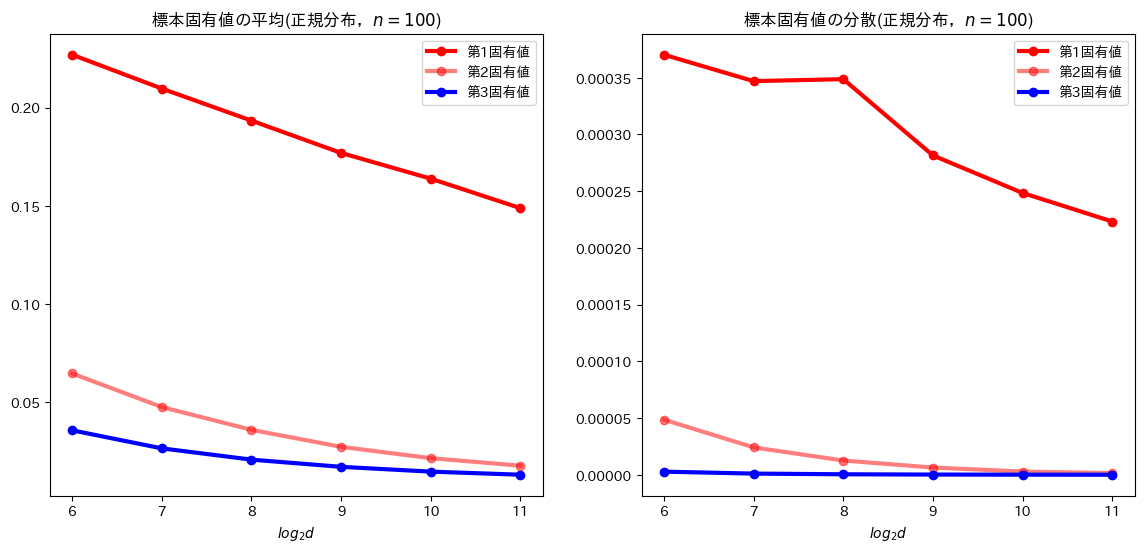

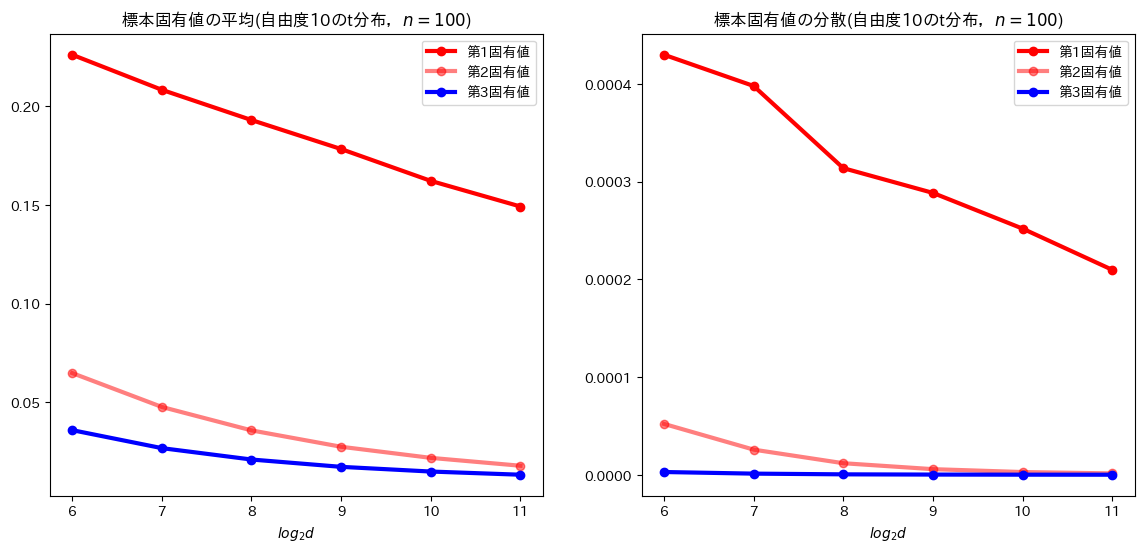

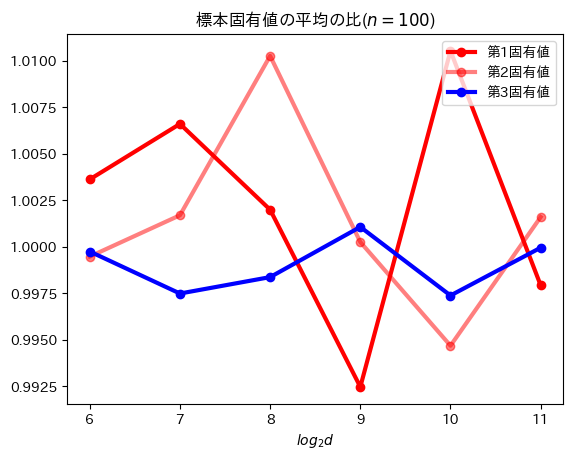

In [4]:
box1_100 = np.load("boxn_n=100_iter=1000.npy")
box2_100 = np.load("boxt_n=100_iter=1000.npy")
lam1_100 = box1_100[:,0,:]
lam2_100 = box1_100[:,1,:]
lam3_100 = box1_100[:,2,:]
lam4_100 = box1_100[:,3,:]
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(np.arange(6,12),lam1_100.mean(axis = 1),c = "r",linewidth = 3,marker = "o",label = "第1固有値")
ax1.plot(np.arange(6,12),lam2_100.mean(axis = 1),c = "r",linewidth = 3,alpha = 0.5,marker = "o",label = "第2固有値")
ax1.plot(np.arange(6,12),lam3_100.mean(axis = 1),c = "b",linewidth = 3,marker = "o",label = "第3固有値")
ax1.legend(loc = "upper right")
ax1.set_xlabel("$log_2 d$")
ax1.set_title("標本固有値の平均(正規分布，$n = 100$)")

ax2.plot(np.arange(6,12),lam1_100.var(axis = 1),c = "r",linewidth = 3,marker = "o",label = "第1固有値")
ax2.plot(np.arange(6,12),lam2_100.var(axis = 1),c = "r",linewidth = 3,marker = "o",alpha = 0.5,label = "第2固有値")
ax2.plot(np.arange(6,12),lam3_100.var(axis = 1),c = "b",linewidth = 3,marker = "o",label = "第3固有値")
ax2.legend(loc = "upper right")
ax2.set_title("標本固有値の分散(正規分布，$n = 100$)")
ax2.set_xlabel("$log_2 d$")
plt.show()
lam1_100 = box2_100[:,0,:]
lam2_100 = box2_100[:,1,:]
lam3_100 = box2_100[:,2,:]
lam4_100 = box2_100[:,3,:]
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(np.arange(6,12),lam1_100.mean(axis = 1),c = "r",linewidth = 3,marker = "o",label = "第1固有値")
ax1.plot(np.arange(6,12),lam2_100.mean(axis = 1),c = "r",linewidth = 3,alpha = 0.5,marker = "o",label = "第2固有値")
ax1.plot(np.arange(6,12),lam3_100.mean(axis = 1),c = "b",linewidth = 3,marker = "o",label = "第3固有値")
ax1.legend(loc = "upper right")
ax1.set_xlabel("$log_2 d$")
ax1.set_title("標本固有値の平均(自由度10のt分布，$n = 100$)")

ax2.plot(np.arange(6,12),lam1_100.var(axis = 1),c = "r",linewidth = 3,marker = "o",label = "第1固有値")
ax2.plot(np.arange(6,12),lam2_100.var(axis = 1),c = "r",linewidth = 3,marker = "o",alpha = 0.5,label = "第2固有値")
ax2.plot(np.arange(6,12),lam3_100.var(axis = 1),c = "b",linewidth = 3,marker = "o",label = "第3固有値")
ax2.legend(loc = "upper right")
ax2.set_title("標本固有値の分散(自由度10のt分布，$n = 100$)")
ax2.set_xlabel("$log_2 d$")
plt.show()

lam11_100 = box1_100[:,0,:]
lam21_100 = box1_100[:,1,:]
lam31_100 = box1_100[:,2,:]
lam41_100 = box1_100[:,3,:]

lam12_100 = box2_100[:,0,:]
lam22_100 = box2_100[:,1,:]
lam32_100 = box2_100[:,2,:]
lam42_100 = box2_100[:,3,:]

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(np.arange(6,12),lam11_100.mean(axis = 1)/lam12_100.mean(axis = 1),c = "r",linewidth = 3,marker = "o",label = "第1固有値")
ax1.plot(np.arange(6,12),lam21_100.mean(axis = 1)/lam22_100.mean(axis = 1),c = "r",linewidth = 3,alpha = 0.5,marker = "o",label = "第2固有値")
ax1.plot(np.arange(6,12),lam31_100.mean(axis = 1)/lam32_100.mean(axis = 1),c = "b",linewidth = 3,marker = "o",label = "第3固有値")
ax1.legend(loc = "upper right")
ax1.set_xlabel("$log_2 d$")
ax1.set_title("標本固有値の平均の比($n = 100$)")
plt.show()